In [2]:
import pickle

pickle.load(open( "out\\nnUNet_preprocessed\Task027_ACDC\\nnUNetPlansv2.1_plans_2D.pkl", "rb" ))

{'num_stages': 1,
 'num_modalities': 1,
 'modalities': {0: 'MRI'},
 'normalization_schemes': OrderedDict([(0, 'nonCT')]),
 'dataset_properties': {'all_sizes': [(10, 256, 216),
   (10, 256, 216),
   (10, 256, 231),
   (10, 256, 231),
   (10, 255, 256),
   (10, 255, 256),
   (10, 256, 232),
   (10, 256, 232),
   (10, 216, 255),
   (10, 216, 255),
   (11, 256, 231),
   (11, 256, 231),
   (10, 223, 222),
   (10, 223, 222),
   (10, 256, 199),
   (10, 256, 199),
   (10, 256, 208),
   (10, 256, 208),
   (10, 256, 208),
   (10, 256, 208),
   (9, 256, 216),
   (9, 256, 216),
   (10, 256, 184),
   (10, 256, 184),
   (10, 256, 216),
   (10, 256, 216),
   (10, 216, 256),
   (10, 216, 256),
   (9, 216, 256),
   (9, 216, 256),
   (10, 256, 192),
   (10, 256, 192),
   (9, 256, 216),
   (9, 256, 216),
   (8, 256, 216),
   (8, 256, 216),
   (11, 256, 216),
   (11, 256, 216),
   (8, 256, 208),
   (8, 256, 208),
   (10, 255, 240),
   (10, 255, 240),
   (7, 256, 200),
   (7, 256, 200),
   (9, 256, 216),
 

256
[0. 1. 2. 3. 4.]
[[0 85 170]
 [0 85 170]
 [0 85 170]]
[[[0.         0.         0.         1.        ]
  [0.         0.83333333 1.         1.        ]
  [1.         0.90123457 0.         1.        ]]

 [[0.         0.         0.         1.        ]
  [0.         0.83333333 1.         1.        ]
  [1.         0.90123457 0.         1.        ]]

 [[0.         0.         0.         1.        ]
  [0.         0.83333333 1.         1.        ]
  [1.         0.90123457 0.         1.        ]]]


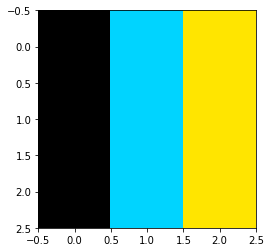

In [17]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt

a = np.array([[0., 1, 2], [0., 1, 2], [0., 1, 2]])

cmap = cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
print(len(cmaplist))

cmaplist[0] = (0, 0, 0, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
print(bounds)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
print(norm(a))
a_new = cmap(norm(a))
print(norm)
print(a_new)

plt.imshow(a_new)

In [3]:
import numpy as np
from glob import glob

for path in glob("C:\\Users\\Portal\\Documents\\Isensee\\nnUNet\\nnunet\out\\nnUNet_preprocessed\\Task027_ACDC\\custom_experiment_planner_stage0\\*.npz"):
    data = np.load(path)
    out = data['data']
    for i in range(out.shape[1]):
        print(out[0, i].std())

0.92798585
0.91713876
0.95974994
0.9584918
0.93643355
0.97288704
1.0303932
1.0517923
1.0711823
1.1467957
0.9942191
0.92671746
0.93690264
0.94063795
0.92311704
0.9534063
1.0197469
1.0469383
1.0733124
1.1542068
0.95917875
0.9830986
0.96091884
0.98083395
0.98704433
0.99414706
0.99359107
0.9971958
1.0214547
1.1112697
0.9711587
0.9726262
0.9500751
0.97286546
0.981317
0.99257904
0.9917063
1.000038
1.0298485
1.1229929
0.87698275
0.9274327
0.95239913
1.0164367
1.0930488
1.085254
1.05582
1.0303789
0.98423415
0.9299033
0.8895261
0.925326
0.94466877
1.0089716
1.0897287
1.0910537
1.0572209
1.0298367
0.98410195
0.93309635
0.88483953
0.8928908
0.89809865
0.9465352
0.95906496
0.96892554
1.0127159
1.0591073
1.1033566
1.1368318
0.87292856
0.88232374
0.88281745
0.9285825
0.9470049
0.9635643
1.0463682
1.0729483
1.1045088
1.1413611
1.0370193
1.1070564
1.0864106
1.073592
1.0364084
0.9951949
0.9420029
0.93015665
0.84654886
0.77998847
1.0243105
1.087091
1.0668609
1.0679008
1.0341301
0.9976618
0.9509323
0.934

In [5]:
%matplotlib qt

import nibabel as nib
import matplotlib.pyplot as plt
import torch

data = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\imagesTr\\patient001_frame01_0000.nii.gz')
gata_gt = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\patient001_frame01.nii.gz')
arr = data.get_fdata()
arr_gt = gata_gt.get_fdata()
print(arr.shape)
print(arr_gt.shape)

arr = torch.from_numpy(arr)
arr_gt = torch.from_numpy(arr_gt)

f = torch.fft.fft2(arr[:, :, 1])
f_gt = torch.fft.fft2(arr_gt[:, :, 1])

fig, ax = plt.subplots(3, 2)
ax[0, 0].imshow(arr[:, :, 1], cmap='gray')
ax[0, 1].imshow(arr_gt[:, :, 1], cmap='gray')
ax[1, 0].imshow(torch.log(torch.fft.fftshift(f.abs())), cmap='gray')
ax[1, 1].imshow(torch.log(torch.fft.fftshift(f_gt.abs())), cmap='gray')
ax[2, 0].imshow(torch.fft.fftshift(f.angle()), cmap='gray')
ax[2, 1].imshow(torch.fft.fftshift(f_gt.angle()), cmap='gray')
plt.show()

(216, 256, 10)
(216, 256, 10)


In [7]:
%matplotlib qt

import nibabel as nib
import matplotlib.pyplot as plt
import torch

data = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\imagesTr\\patient001_frame01_0000.nii.gz')
gata_gt = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\patient001_frame01.nii.gz')
arr = data.get_fdata()
arr_gt = gata_gt.get_fdata()
print(arr.shape)
print(arr_gt.shape)

arr = torch.from_numpy(arr)
arr_gt = torch.from_numpy(arr_gt)

f = torch.fft.fftshift(torch.fft.fft2(arr[:, :, 1]))
f_gt = torch.fft.fftshift(torch.fft.fft2(arr_gt[:, :, 1]))

cy = f.shape[0] / 2
cx = f.shape[1] / 2

f[int(cy - (cy * 0.5)):int(cy + (cy * 0.5)), int(cx - (cx * 0.5)):int(cx + (cx * 0.5))] = 0
f_gt[int(cy - (cy * 0.5)):int(cy + (cy * 0.5)), int(cx - (cx * 0.5)):int(cx + (cx * 0.5))] = 0

f = torch.fft.ifftshift(f)
f_gt = torch.fft.ifftshift(f_gt)

f_after = torch.fft.ifft2(f)
f_gt_after = torch.fft.ifft2(f_gt)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(arr[:, :, 1], cmap='gray')
ax[0, 1].imshow(arr_gt[:, :, 1], cmap='gray')
ax[1, 0].imshow(f_after.real, cmap='gray')
ax[1, 1].imshow(f_gt_after.real, cmap='gray')
plt.show()

(216, 256, 10)
(216, 256, 10)


(216, 304, 8)
(216, 304, 8)


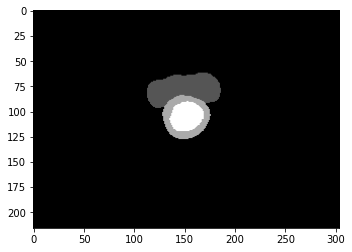

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt

data = nib.load('patient100_frame01_pred.nii.gz')
data_gt = nib.load('patient100_frame01_gt_raw.nii.gz')
arr = data.get_fdata()
arr_gt = data_gt.get_fdata()
print(arr.shape)
print(arr_gt.shape)

fig, ax = plt.subplots(1, 1)
ax.imshow(arr[:, :, 1], cmap='gray')
plt.show()

(512, 512)


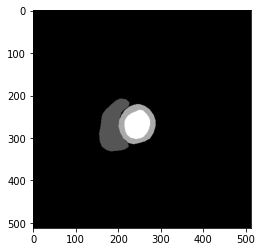

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data_ok\RACINE\RACINE_AV04049_20140528\RACINE_AV04049_20140528_Slice_05_phase_02.npz')
print(data['arr_0'].shape)
plt.imshow(data['arr_1'], cmap='gray')

In [5]:
import nibabel as nib

data = nib.load('ACDC_training\patient001\patient001_frame01.nii.gz')
arr = data.get_fdata()
print(arr.shape)

(216, 256, 10)


In [1]:
from pathlib import Path
import shutil
from glob import glob
import os
import numpy as np
from tqdm import tqdm
import nibabel as nib

def get_slice_numbers(path_list):
    slice_number_list = []
    for path in path_list:
        slice_nb = path.split('Slice')[-1].split('_')[1]
        slice_number_list.append(slice_nb)
    return list(set(slice_number_list))

def delete_if_exist(folder_name):
    dirpath = Path(folder_name)
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

new_folder_name = 'custom_lib'

delete_if_exist(new_folder_name)

Path(new_folder_name).mkdir(parents=True, exist_ok=True)

for i, patient in enumerate(tqdm(glob('data_ok/*/*'))):
    patient_string = ('patient' + str(i + 1).zfill(3))
    patient_folder_name = os.path.join(new_folder_name, patient_string)
    delete_if_exist(patient_folder_name)
    Path(patient_folder_name).mkdir(parents=True, exist_ok=True)
    all_patient_files = glob(os.path.join(patient, '*'))
    slice_nb_list = get_slice_numbers(all_patient_files)
    for slice_nb in slice_nb_list:
        gt_list = []
        image_list = []
        for patient_file in all_patient_files:
            if slice_nb not in patient_file:
                continue
            else:
                data = np.load(patient_file)
                image_list.append(data['arr_0'])
                gt_list.append(data['arr_1'])
        image_list = np.stack(image_list, axis=2)
        gt_list = np.stack(gt_list, axis=2)
        nib.save(nib.Nifti1Image(image_list, affine=np.eye(4)), os.path.join(patient_folder_name, patient_string + '_frame' + slice_nb + '.nii.gz'))  
        nib.save(nib.Nifti1Image(gt_list, affine=np.eye(4)), os.path.join(patient_folder_name, patient_string + '_frame' + slice_nb + '_gt.nii.gz'))  


100%|██████████| 206/206 [10:09<00:00,  2.96s/it]


In [5]:
import numpy as np
import SimpleITK as sitk
import nibabel as nib

data = np.load('C:\\data_jonas\\cholcoeur\\Original\\ID_$$$.__default_user (2)_Slice_05.npz')
print(data.files)
print(data['Pixel_shape'])
print(data['ImageSpacing'])
print(data['Number_Slice'])
print(data['resX'])
print(data['resY'])
print(data['resT'])
print(data['image'].shape)

img = nib.Nifti1Image(data['image'], np.eye(4))
print(img.header)
image = sitk.GetImageFromArray(data['image'])
print(image[0].GetDirection())

['image', 'label_img', 'Pixel_shape', 'resX', 'resY', 'resT', 'ImageSpacing', 'Number_Slice']
[1.31944442 1.31944442]
[288 216]
25
1.3194444179535
1.3194444179535
0.034799999237061
(25, 288, 216)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  25 288 216   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : 

In [11]:
from pathlib import Path
import shutil
from glob import glob
import os
from tqdm import tqdm
import numpy as np
import nibabel as nib

def delete_if_exist(folder_name):
    dirpath = Path(folder_name)
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

def fix_labels(label):
    label[label == 1] = 3
    label[label == 4] = 1
    return label

new_folder_name = 'custom_lib'

delete_if_exist(new_folder_name)

Path(new_folder_name).mkdir(parents=True, exist_ok=True)
folder_nb = 0

past_name = ''
for patient in tqdm(glob('data_ok_original/**/*.npz', recursive=True)):
    broken_string = patient.split('_Slice_')
    name = broken_string[0]
    slice_nb = broken_string[-1].split('.')[0]
    if name != past_name:
        folder_nb += 1
        patient_string = ('patient' + str(folder_nb).zfill(3))
        patient_folder_name = os.path.join(new_folder_name, patient_string)
        delete_if_exist(patient_folder_name)
        Path(patient_folder_name).mkdir(parents=True, exist_ok=True)
    data = np.load(patient)
    img = np.transpose(data['image'], (1, 2, 0))
    label = np.transpose(data['label_img'], (1, 2, 0))
    label = fix_labels(label)
    img = nib.Nifti1Image(img, affine=np.eye(4))
    label = nib.Nifti1Image(label, affine=np.eye(4))
    img.header['pixdim'] = [1.0, data['resY'], data['resX'], data['resT'], 1.0, 1.0, 1.0, 1.0]
    label.header['pixdim'] = [1.0, data['resY'], data['resX'], data['resT'], 1.0, 1.0, 1.0, 1.0]
    nib.save(img, os.path.join(patient_folder_name, patient_string + '_slice' + slice_nb + '.nii.gz'))  
    nib.save(label, os.path.join(patient_folder_name, patient_string + '_slice' + slice_nb + '_gt.nii.gz'))
    past_name = name

100%|██████████| 625/625 [05:10<00:00,  2.01it/s]


In [1]:
import nibabel as nib

a = nib.load(r'out\nnUNet_raw_data_base\nnUNet_raw_data\Task027_ACDC\labelsTr\patient001_frame12.nii.gz')
a = a.get_fdata()
sample = a[:, :, ]


(216, 256, 10)


(1, 11, 255, 207)


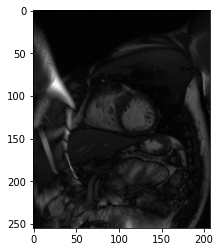

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load(r'out\nnUNet_raw_data_base\nnUNet_cropped_data\Task026_M&Ms\A4J4S4_frame14_u.npz')
print(data['data'].shape)

plt.imshow(data['data'][0, 4, :, :], cmap='gray')

In [15]:
%matplotlib qt

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

for path in glob(r'out\nnUNet_preprocessed\Task026_MMs\gt_segmentations\*'):
    img = nib.load(path)
    img = img.get_fdata()
    assert np.count_nonzero(img > 0) > 0

#plt.imshow(img[:, :, 8], cmap='gray')

In [17]:
data = np.load('C:\\data_jonas\\RACINE\\Original\\RACINE_AJ04069_20141203_Slice_05.npz')
label = np.transpose(data['label_img'], (1, 2, 0))
plt.imshow(label[:, :, 0], cmap='gray')

In [23]:
import torch

t1 = torch.rand(1, 3, 4)
t2 = torch.rand(1, 3, 3)
out = torch.matmul(t2, t1)
print(out.shape)

torch.Size([1, 3, 4])


In [32]:
import pickle

with open(r'out\nnUNet_preprocessed\Task026_MMs\splits_final.pkl', 'rb') as fd:
    d = pickle.load(fd)
    print(len(d[0]['val']))
    print(d)

272
[OrderedDict([('train', array(['A0S9V9_frame01', 'A0S9V9_frame10', 'A1D0Q7_frame01',
       'A1D0Q7_frame10', 'A1D9Z7_frame12', 'A1D9Z7_frame23',
       'A1E9Q1_frame01', 'A1E9Q1_frame10', 'A1O8Z3_frame11',
       'A1O8Z3_frame24', 'A2C0I1_frame01', 'A2C0I1_frame08',
       'A2N8V0_frame01', 'A2N8V0_frame10', 'A3B7E5_frame13',
       'A3B7E5_frame30', 'A3H1O5_frame01', 'A3H1O5_frame13',
       'A4B5U4_frame01', 'A4B5U4_frame11', 'A4J4S4_frame01',
       'A4J4S4_frame08', 'A4U9V5_frame01', 'A4U9V5_frame09',
       'A5E0T8_frame09', 'A5E0T8_frame25', 'A6B5G9_frame01',
       'A6B5G9_frame12', 'A6D5F9_frame01', 'A6D5F9_frame12',
       'A6M1Q7_frame12', 'A6M1Q7_frame30', 'A7D9L8_frame01',
       'A7D9L8_frame12', 'A7G0P5_frame10', 'A7G0P5_frame29',
       'A7M7P8_frame01', 'A7M7P8_frame10', 'A7O4T6_frame01',
       'A7O4T6_frame11', 'A8C9U8_frame10', 'A8C9U8_frame29',
       'A8E1F4_frame10', 'A8E1F4_frame25', 'A9C5P4_frame09',
       'A9C5P4_frame30', 'A9E3G9_frame09', 'A9E3G9_frame2

In [7]:
import SimpleITK as sitk
import nibabel as nib

path = 'out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\imagesTr\\patient094_frame01_0000.nii.gz'
data = sitk.ReadImage(path)
print(data[0].GetSpacing())
print(data[0].GetOrigin())
print(data[0].GetDirection())

n2_img = nib.load(path)
print(n2_img.shape)
print(n2_img.header)

(1.6826900243759155, 5.0)
(0.0, 0.0)
(1.0, 0.0, 0.0, 1.0)
(208, 174, 10)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 208 174  10   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.      1.68269 1.68269 5.      1.      1.      1.      1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_

In [29]:
import nibabel as nib
import matplotlib.pyplot as plt
from copy import copy

nib_img = nib.load('ACDC_training\\patient001\\patient001_4d.nii.gz')
img = nib_img.get_fdata()
nib_img2 = nib.load('ACDC_training\\patient001\\patient001_frame01.nii.gz')
img2 = nib_img2.get_fdata()
for key, value in nib_img.header.items():
    nib_img2.header[key] = value

print(img.shape)
print(img2.shape)
print(np.all(img2[:, :, 5] == img[:, :, 5, 0]))
print(np.all(img2[:, :, 5] == img[:, :, 5, 1]))
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img[:, :, 5, 1], cmap='gray')
ax[1].imshow(img[:, :, 5, 0], cmap='gray')
ax[2].imshow(img2[:, :, 5], cmap='gray')

(216, 256, 10, 30)
(216, 256, 10)
True
False


In [2]:
import nibabel as nib
import matplotlib.pyplot as plt

img = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\imagesUn\\patient030_frame04_0000.nii.gz')
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 216 256  10   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ 1.         1.4453125  1.4453125 10.         1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 536.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 1438
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z  

In [3]:
import numpy as np

data = np.load(r'out\nnUNet_raw_data_base\nnUNet_cropped_data\Task027_ACDC\unlabeled\patient001_frame02.npz')
print(data['data'].shape)

(1, 10, 256, 216)


In [2]:
import pickle

def load_pickle(file: str, mode: str = 'rb'):
    with open(file, mode) as f:
        a = pickle.load(f)
    return a

data = load_pickle(r'out\nnUNet_preprocessed\Task027_ACDC\dataset_properties.pkl')
print(data)

{'all_sizes': [(10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 216), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 256, 231), (10, 255, 256), (10, 255,

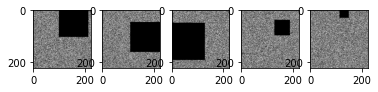

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def rand_bbox(size):
    B = size[0]
    W = size[2]
    H = size[3]

    lam = np.random.beta(1, 1, size=(B,))

    cut_rat = np.sqrt(1. - lam)
    cut_w = (W * cut_rat).astype(np.int32)
    cut_h = (H * cut_rat).astype(np.int32)

    # uniform
    cx = np.random.randint(W, size=(B,))
    cy = np.random.randint(H, size=(B,))

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

bbx1, bby1, bbx2, bby2 = rand_bbox(size=(5, 1, 224, 224))
t = torch.rand(size=(5, 1, 224, 224))
for i in range(len(bbx1)):
    t[i, :, bbx1[i]:bbx2[i], bby1[i]:bby2[i]] = 0

fig, ax = plt.subplots(1, 5)
for j in range(5):
    ax[j].imshow(t[j, 0], cmap='gray')
plt.show()

In [2]:
import torch

t = torch.randn(10)
t > 0.5

tensor([False, False, False,  True,  True, False, False,  True, False, False])